<a href="https://colab.research.google.com/github/madhupallavi006/Ecommerce-website/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [18]:
data = {
    'text': [
        "NASA launches satellite to study climate",
        "Football match ends with 3-2 score",
        "Stock market reaches record high",
        "New AI technology released by Google",
        "Government announces new policies",
        "Lionel Messi scores a goal",
        "Scientists develop renewable energy",
        "Federal Reserve announces interest rate change",
        "Olympics 2021: Record medals won",
        "Tesla launches new electric car",
        "Basketball championship finals held",
        "New vaccine approved by FDA",
        "Amazon rainforest species discovered",
        "Apple releases new iPhone",
        "Manchester United wins Premier League",
        "Economy rebounds after pandemic",
        "Google AI achieves human-level translation",
        "Football league postponed due to rain"
    ],
    'label': [
        "Sci/Tech","Sports","Business","Sci/Tech","World",
        "Sports","Sci/Tech","Business","Sports","Sci/Tech",
        "Sports","Sci/Tech","Sci/Tech","Sci/Tech","Sports",
        "Business","Sci/Tech","Sports"
    ]
}


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


In [20]:
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 10
Testing samples: 5


In [21]:

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tf.shape)


TF-IDF feature shape: (10, 49)


In [22]:

model = MultinomialNB()
model.fit(X_train_tf, y_train)


MultinomialNB()

In [23]:

y_pred = model.predict(X_test_tf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

    Business       0.00      0.00      0.00         1
    Sci/Tech       0.40      1.00      0.57         2
      Sports       0.00      0.00      0.00         2

    accuracy                           0.40         5
   macro avg       0.13      0.33      0.19         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


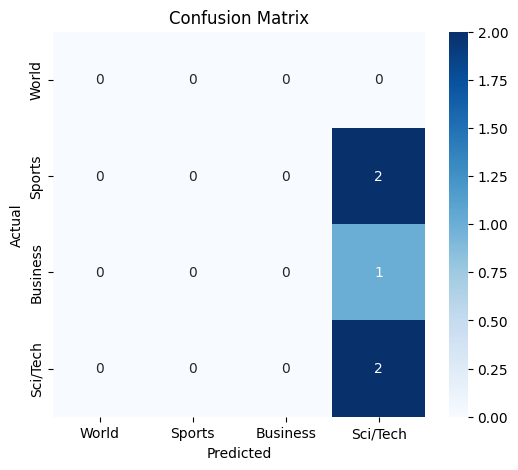

In [24]:

cm = confusion_matrix(y_test, y_pred, labels=["World", "Sports", "Business", "Sci/Tech"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["World", "Sports", "Business", "Sci/Tech"],
            yticklabels=["World", "Sports", "Business", "Sci/Tech"], cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()


In [25]:

def predict_news(news):
    news_tf = vectorizer.transform([news])
    category = model.predict(news_tf)[0]
    return category

test_news = [
    "Apple announces new iPhone release",
    "Real Madrid wins the championship",
    "Federal Reserve increases interest rates",
    "Scientists develop new AI algorithm"
]

for news in test_news:
    print(f"News: {news}")
    print("Predicted Category:", predict_news(news))
    print("---")


News: Apple announces new iPhone release
Predicted Category: Sci/Tech
---
News: Real Madrid wins the championship
Predicted Category: Sports
---
News: Federal Reserve increases interest rates
Predicted Category: Sci/Tech
---
News: Scientists develop new AI algorithm
Predicted Category: Sci/Tech
---
